### Rev. 3—012323

# It's time for the world-famous ArnaoutLab interview!

You have **1 day** to complete one of the two questions below.

**Each question consists of three parts, plus a bonus.** If you get tangled up in one part, just explain what you're doing, what's got you stumped, and what you would do if you could get past the part that's giving you trouble, and move on to the next part.

**If you have any questions, or feel you might need more time,** please text Dr. Arnaout at 617-538-5681. We will not be checking email frequently enough to answer questions by email.

**You're free to use any resource** (library documentation, online search, stackoverflow, etc.) as needed to help you solve these problems. That's what we do in the lab. However, we prefer you work by yourself, because we won't necessarily be able to hire the people you worked with. That said, if you had to ask someone for help, just say so: honesty is the best policy.

**Show your work in this Python notebook.** We should be able to run the notebook and see your work in action.

**Please comment your code!** It helps us see how you think.

# Good luck, and have fun!

---

# Question 1

This question is about proteins and patterns.

## Part 1: Proteins

**Retrieve the <a href="https://www.rcsb.org/structure/1igt">Protein Data Bank entry `1IGT`</a>:**

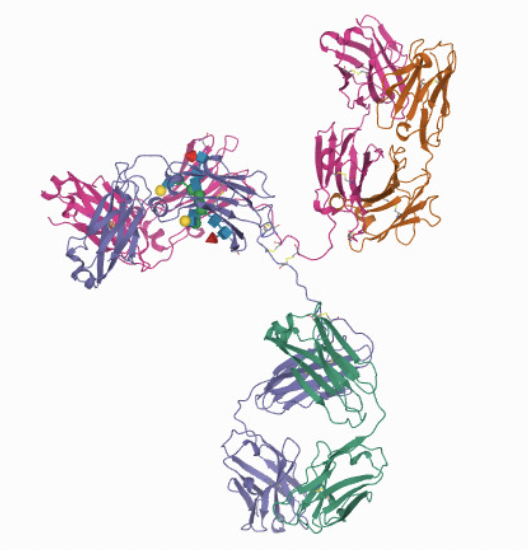

**and display it interactively in this Jupyter notebook.**

- You can retrieve it however you like, but we recommend doing it programmatically, for example using Biopython.
- You can display it using whatever viewer you like, but we recommend Nglview; worst-case, feel free to use matplotlib's scatter in 3D and plot the atoms.

In [1]:
import py3Dmol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
#I'm using the py3Dmol package.

view = py3Dmol.view(query='pdb:1igt')
view.setStyle({'cartoon':{'color':'spectrum'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Part 2: Patterns

The `Question_1_data` directory contains two text files, `r1.txt` and `r2.txt`. Each contains a *repertoire* composed of a list of 10,000 variable-length strings. Each string represents a short amino acid sequence that looks something like the below:

    CGRAMCSMYEPFPSSVLEMKITFDYW
    CGRAWMKYSHYVYCYMRFDCKFCYSMMDVW
    CGRLMLFWRQVRDHIRSMIWMVYKGFDYW

Your goal is to describe differences between these two repertoires.

1. How does the length distribution of repertoire 1 compare to the length distribution of repertoire 2? Plot histograms of the length distributions.
2. Provide simple summary statistic(s) for each distribution, and in a sentence explain why these statistics provide a reasonable summary.
3. Test the null hypothesis that the two length distributions are no different than would be expected by chance: i.e., choose a statistical test for this hypothesis, run that test, and provide the p value. Provide a 1-sentence summary of why you chose this test, and how you interpret the result.

In [3]:
p1 = np.loadtxt("Question_1_data/r1.txt", dtype=str)
p2 = np.loadtxt("Question_1_data/r2.txt", dtype=str)

In [4]:
l1 = pd.DataFrame([len(string) for string in p1])
l1.columns=['Length']
l2 = pd.DataFrame([len(string) for string in p2])
l2.columns =['Length']

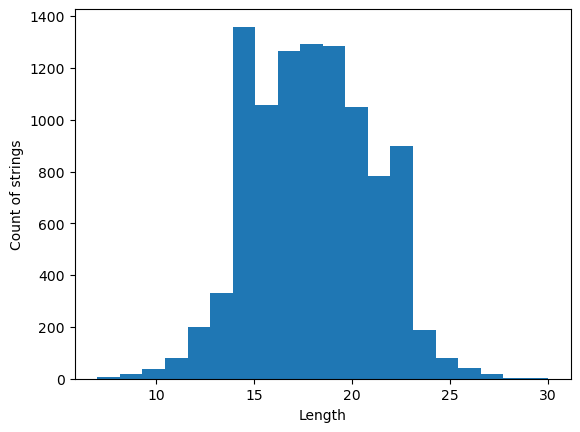

In [5]:
#Plotting the histogram of lengths for p1:
plt.hist(l1, bins=20)
plt.xlabel("Length")
plt.ylabel("Count of strings")
plt.show()

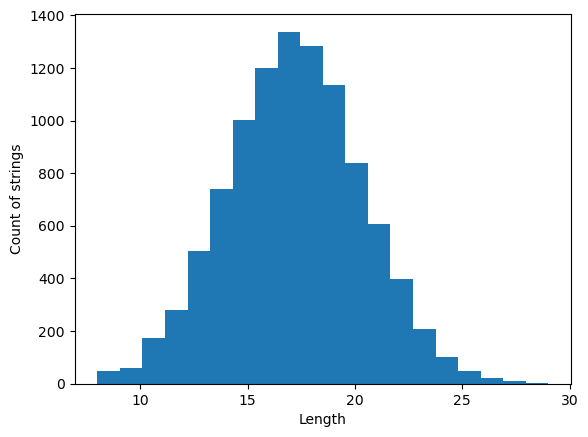

In [6]:
#Plotting the histogram of lengths for p2:
plt.hist(l2, bins=20)
plt.xlabel("Length")
plt.ylabel("Count of strings")
plt.show()

We see that the length distribution for p1 and for p2 are somewhat similar. For example, they both peak at somewhere between length 15 and length 20. However, they are also a bit different from each other: the length distribution for p2 looks more like a normal distribution than p1 (because p1 looks like it has more than one maxima).

In [7]:
#Summary statistics for p1 length distribution:
l1.describe()

,Length
count,10000.000000
mean,17.994600
std,3.021702
min,7.000000
25%,16.000000
50%,18.000000
75%,20.000000
max,30.000000


In [8]:
#Summary statistics for p2 length distribution:
l2.describe()

,Length
count,10000.000000
mean,17.246900
std,3.009094
min,8.000000
25%,15.000000
50%,17.000000
75%,19.000000
max,29.000000


The summary statistics above are a reasonable description of the length distribution, because the distributions look simple enough. If we had some very complicated-looking distributions, it would not be reasonable to describe them just by the means, the medians etc.

Now we do the hypothesis testing. The null hypothesis is that the two length distributions are drawn from the same probability distribution. We will use the technique of permutation (which consists of scrambling the order of the lengths of both arrays), and we will use the difference between the means as the test statistics. If the null hypothesis were true, the observed mean difference should not be statistically significant. 

First, we need to define a few functions:

In [9]:
#This function takes two numpy arrays, combine them into a single array,
#scramble the order of their elements randomly, and split the combine array into two arrays again.

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data2):]
    return perm_sample_1, perm_sample_2

In [10]:
#This function takes two numpy arrays, and returns the difference between their means.

def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [11]:
#This function takes two numpy arrays, a function (which is the test statistics), a size 
#(how many permutation replicates we want), and returns the permutation replicates.

def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

Now, we compute the empirical (or observed) mean difference.

In [12]:
empirical_diff_means = diff_of_means(l1['Length'].to_numpy(), l2['Length'].to_numpy())
empirical_diff_means

0.7476999999999983

Next, we generate 10000 permutation replicates (i.e. 10000 mean differences, each of which comes from a particular 
permutation of the lengths). We plot the histogram of the permutation replicates, as well as a vertical line indicating the empirical mean difference.

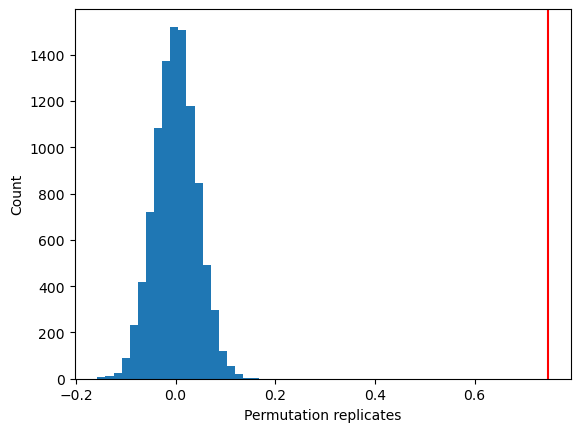

In [13]:
perm_replicates = draw_perm_reps(l1['Length'].to_numpy(), l2['Length'].to_numpy(), diff_of_means, size=10000)
plt.hist(perm_replicates,bins=20)
plt.xlabel('Permutation replicates')
plt.ylabel('Count')
plt.axvline(x=empirical_diff_means, color='red', linestyle='-')
plt.show()

From the plot above, it's pretty clear that the p-value is zero, because the empirical mean difference lies very far to the right of the histogram. But let's still compute the p-value and check that it's zero:

In [14]:
p = np.sum(perm_replicates >= empirical_diff_means)/len(perm_replicates >= empirical_diff_means)
print('p-value =', p)

p-value = 0.0


Such a small p-value means that, under the null hypothesis, it is virtually impossible to observe the mean difference which we have observed. So, we reject the null hypothesis, and conclude that the two length distributions are not drawn from the same probability distribution.

## Part 3: Learning

In a few sentences, describe how you would go about using deep learning to classify a new string not seen before---i.e., not found in either `r1.txt` or `r2.txt`---as belonging to repertoire 1 vs. repertoire 2 (a binary classifier). 

1. What questions would need to be answered to constrain this problem? 
2. What challenges would you expect to encounter? 
3. What familiar DL architecture(s) would or would not be well suited to this problem?

## Bonus time!

For the bonus, let's try some subtler patterns. We want to know if there are any 3-letter substrings---i.e., 3-mer amino-acid motifs---that are statistically over-represented in one repertoire, relative to the other.

1. Are there any? If so, list it/them, and indicate which repertoire it/they are over-represented in. How did you find it/them?
2. If there are, for each motif, what is the probability of the observed level of over-representation? Either way, show what statistical test you used, and describe the null hypothesis in a sentence.

---

In [15]:
#Creating a new column in the dataframe l1, where each entry is an amino-acid sequence with white space inserted
#between letters.

l1['Words'] = 0

for i in range(len(p1)):
    l1['Words'][i] = p1[i].replace("", " ").strip()

l1.head()

,Length,Words
0,21,C G R K Y K S Y P G H F Y W P C T M D V W
1,18,C A R E V S M S H F V V S F F D Y W
2,13,C G R L P I Y C F M D V W
3,15,C A R V F T V P D H I F D Y W
4,16,C G R H R W T Q M F K G M D V W


In [16]:
#Similarly for l2.

l2['Words'] = 0

for i in range(len(p2)):
    l2['Words'][i] = p2[i].replace("", " ").strip()

l2.head()

,Length,Words
0,20,C G T S K M T Y M R M K T D K N M D V W
1,15,C A R H A Y L D Q T Y F D Y W
2,15,C A R A T K F F P F N F D Y W
3,12,C G R D S F K M F D Y W
4,20,C A T R L D I T F S F L C K P N F D Y W


In [17]:
#Use the CountVectorizer to count the number of times each trimer occurs in repertoire 1.

cv_trigram_vec_1 = CountVectorizer(ngram_range=(3,3), token_pattern = r"(?u)\b\w+\b")
cv_trigram_1 = cv_trigram_vec_1.fit_transform(l1['Words'])
cv_tri_df_1 = pd.DataFrame(cv_trigram_1.toarray(), 
                 columns=cv_trigram_vec_1.get_feature_names_out()).add_prefix('Counts_')
print(cv_tri_df_1.sum().sort_values(ascending=False).head(10))

Counts_d y w    6709
Counts_f d y    6689
Counts_c a r    3918
Counts_c g r    3652
Counts_m d v    3358
Counts_d v w    3348
Counts_c a t    1253
Counts_c g t    1219
Counts_y f d     501
Counts_a f d     472
dtype: int64


In [18]:
#Similarly for repertoire 2.

cv_trigram_vec_2 = CountVectorizer(ngram_range=(3,3), token_pattern = r"(?u)\b\w+\b")
cv_trigram_2 = cv_trigram_vec_2.fit_transform(l2['Words'])
cv_tri_df_2 = pd.DataFrame(cv_trigram_2.toarray(), 
                 columns=cv_trigram_vec_2.get_feature_names_out()).add_prefix('Counts_')
print(cv_tri_df_2.sum().sort_values(ascending=False).head(10))

Counts_d y w    6722
Counts_f d y    6714
Counts_c a r    3787
Counts_c g r    3727
Counts_m d v    3333
Counts_d v w    3327
Counts_c g t    1257
Counts_c a t    1252
Counts_y f d     548
Counts_a f d     521
dtype: int64


In [32]:
#Computing the difference in the number of occurrences of each trimer between the two repertoires. 
#Sort by the surplus of repertoire 2 over repertoire 1, in descending order.

tri_differences = cv_tri_df_1.sum() - cv_tri_df_2.sum()
print(tri_differences.sort_values().head(10))

Counts_v f d   -100.0
Counts_q q q    -86.0
Counts_c g r    -75.0
Counts_k f d    -61.0
Counts_r m d    -53.0
Counts_a f d    -49.0
Counts_y f d    -47.0
Counts_g r h    -44.0
Counts_g r i    -39.0
Counts_c g t    -38.0
dtype: float64


We see that the trimers "vfd", "qqq", "cgr" etc. are over-represented in repertoire 2 compared to repertoire 1.

In [33]:
#Now sort by the opposite order (surplus of repertoire 1 over repertoire 2, in descending order).

print(tri_differences.sort_values(ascending=False).head(10))

Counts_c a r    131.0
Counts_d i f    125.0
Counts_g r y    110.0
Counts_r h n    110.0
Counts_i f d    105.0
Counts_a r h     73.0
Counts_l s f     64.0
Counts_r r s     60.0
Counts_s f d     55.0
Counts_a m d     50.0
dtype: float64


We see that the trimers "car", "dif", "gry" etc. are over-represented in repertoire 1 compared to repertoire 2.

# Question 2

This question is about images and information.

## Part 1

In the `Question_2_data` directory you will find six images, img0.jpg through img5.jpg:

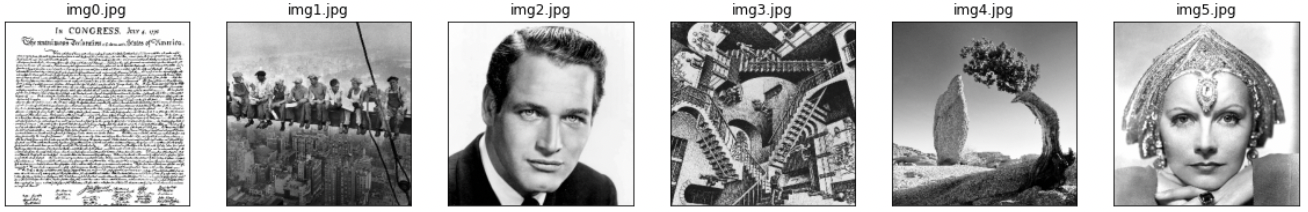

1. Calculate the similarity between each pair of images using SSIM (the structural similarity index)
2. Visualize these similarities by making a clustermap

In [22]:
#importing the necessary packages
from skimage.metrics import structural_similarity as ssim
import seaborn as sns
import cv2

In [23]:
#loading the images
img_0 = cv2.imread('Question_2_data/img0.jpg')
img_1 = cv2.imread('Question_2_data/img1.jpg')
img_2 = cv2.imread('Question_2_data/img2.jpg')
img_3 = cv2.imread('Question_2_data/img3.jpg')
img_4 = cv2.imread('Question_2_data/img4.jpg')
img_5 = cv2.imread('Question_2_data/img5.jpg')

In [24]:
#Calculating the similarity between each pair of images
img_list = [img_0, img_1, img_2, img_3, img_4, img_5]
similarities = [[None for _ in range(6)] for _ in range(6)]

for i in range(6):
    for j in range(i,6):
        similarities[i][j] = ssim(img_list[i], img_list[j], channel_axis=2)
        similarities[j][i] = ssim(img_list[i], img_list[j], channel_axis=2)
        print("Similarity between image", i, "and image", j, ":", ssim(img_list[i], img_list[j], channel_axis=2))

Similarity between image 0 and image 0 : 1.0
Similarity between image 0 and image 1 : 0.06026064190842082
Similarity between image 0 and image 2 : 0.09956670921762685
Similarity between image 0 and image 3 : 0.008916509695750299
Similarity between image 0 and image 4 : 0.07306094365113515
Similarity between image 0 and image 5 : 0.08401060419427343
Similarity between image 1 and image 1 : 1.0
Similarity between image 1 and image 2 : 0.11361522537014289
Similarity between image 1 and image 3 : 0.019085996524237314
Similarity between image 1 and image 4 : 0.11994357323765785
Similarity between image 1 and image 5 : 0.1119679231595846
Similarity between image 2 and image 2 : 1.0
Similarity between image 2 and image 3 : 0.028033467055559747
Similarity between image 2 and image 4 : 0.21829566053841817
Similarity between image 2 and image 5 : 0.21750038803361196
Similarity between image 3 and image 3 : 1.0
Similarity between image 3 and image 4 : 0.03077306149638329
Similarity between image 

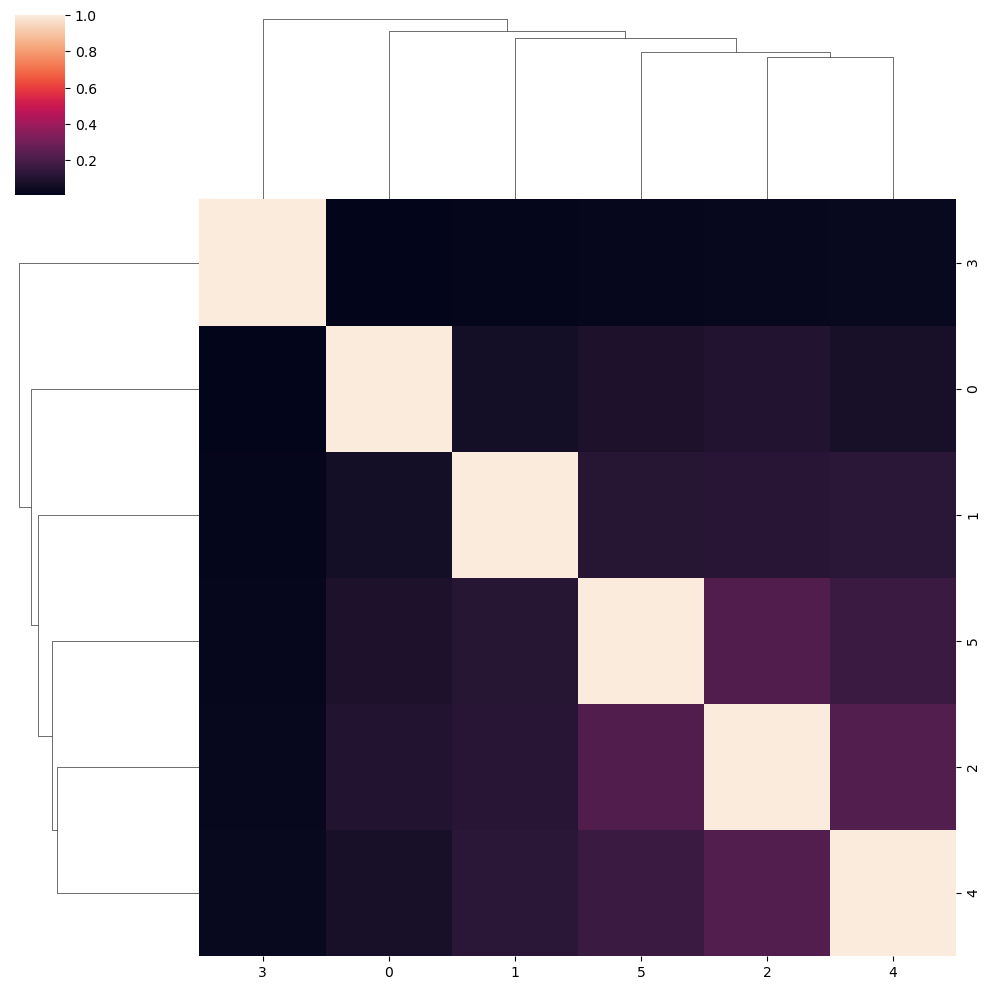

In [25]:
_ = sns.clustermap(similarities)
plt.show()

## Part 2

This part is about interpretation and planning.

1. In a sentence or two, please rationalize why the most similar pairs of images are so similar. What does this have to do with how SSIM calculates similarities?
2. If you wanted to train a neural net to classify, for example, faces vs. non-faces, how would you go about creating a training set with the fewest possible images that would achieve the best possible results? Please answer in a few sentences.

Answers:
1. The SSIM is highest between img2.jpg and img4.jpg, and second highest between img2.jpg and img5.jpg. The similarity between img2.jpg and img4.jpg can be explained as follows: img2.jpg is the image of a person's face, and img4.jpg is the image of a landscape that looks vaguely like the contours of a person's face. The similarity between img2.jpg and img5.jpg is more obvious, because both of those images are images of somebody's face.

2. A good rule of thumb is that we need at least 1000 images for each class. So, we need 1000 images with faces, and 1000 images with non-faces, for a total of 2000 images. I choose the same number of face images as non-face images to avoid any class imbalance. If the available data is imbalanced (for example if there are many more non-face images than face images), then I would use techniques such as SMOTE to generate more data in the minority class.

## Part 3

This part is about a set of 10 different items (*not* the images above! this part is separate). 

You are given two different collections of these items, $p$ and $r$, which differ in terms of the number of instances of each item they contain. 

The number of instances of each of the 10 items is given in the files `p.txt` and `r.txt` in the `Question_3` directory. For example, $p$ contains 9 instances of item 3, while $r$ contains just 1 instance of item 3.

**Your task is to measure difference between the two collections, in various ways.**

1. Visualize the frequency distributions of items in each of these collections by **making a histogram of $p$ and a histogram of $r$**. Be sure to label your histograms.
2. We can think of each collection as a vector in a 10-dimensional space. What is the **Euclidean distance** between these vectors? Is it symmetric (i.e., is it the same distance from $p$ to $r$ as from $r$ to $p$)?
3. What is the **cosine distance** between these vectors? Is it symmetric?
4. We can also think of the distributions of item frequencies in these two collections in terms of the information content of these distributions relative to each other. What is the **relative entropy** between them? Is it symmetric?
5. In a sentence, explain why each of these should, or should not necessarily, be symmetric.

In [26]:
#load the files p.txt and r.txt into numpy arrays
p = np.loadtxt("Question_2_data/p.txt", dtype=int, delimiter=',')
r = np.loadtxt("Question_2_data/r.txt", dtype=int, delimiter = ',')

print(p)
print(r)

[16  3 26  3  2  1 12  1 15 21]
[ 1  2 13 25 30 23  3  1  1  1]


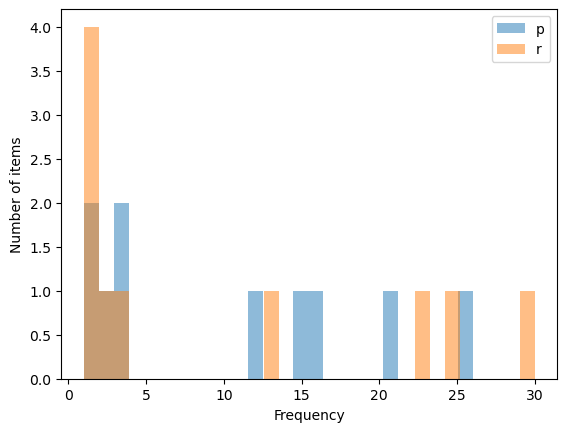

In [27]:
#Answer to question 1:
plt.hist(p,bins=26, alpha=0.5, label='p')
plt.hist(r,bins=30, alpha=0.5, label='r')
plt.xlabel("Frequency")
plt.ylabel("Number of items")
plt.legend(loc='upper right')
plt.show()

In [28]:
#Answer to question 2:
#Computing the Euclidean distance between p and r

def norm_squared(v):
    sum = 0
    for i in range(len(v)):
        sum += v[i]**2
    return sum

Euclidean_dist = np.sqrt(norm_squared(p-r))
print(Euclidean_dist)

53.14132102234569


Yes, the Euclidean distance is symmetric between p and r.

In [29]:
#Answer to question 3:
#Computing the cosine distance between p and r

def inner_product(v1, v2):
    sum = 0
    for i in range(len(v1)):
        sum += v1[i]*v2[i]
    return sum

cosine_similarity = inner_product(p,r)/(np.sqrt(norm_squared(p))*np.sqrt(norm_squared(r)))
cosine_dist = 1 - cosine_similarity
print(cosine_dist)

0.7028552085276021


Yes, the cosine distance is symmetric between q and r.

In [30]:
#Answer to question 4:
#We define a function to compute the relative entropy between two arbitrary discrete probability distributions:

def relative_entropy(p1, p2):
    sum = 0
    for i in range(len(p1)):
        sum += p1[i]*np.log(p1[i]/p2[i]) + p2[i] - p1[i]
    return sum

#Computing the relative entropy of p with respect to r:

print("D_KL (p||r):", relative_entropy(p,r))

#Computing the relative entropy of r with respect to p:

print("D_KL (r||p):", relative_entropy(r,p))

D_KL (p||r): 169.87851289014947
D_KL (r||p): 183.85857339651827


As we can see from the two answers above, the relative entropy is not symmetric.

Answer to question 5: the Euclidean distance and the cosine distance are symmetric, because they capture our everyday intuition about distances and angles. Namely, our intuition suggests that the distance between point A and point B is the same as the distance between point B and point A, and also that the angle formed between direction A and direction B should be the same as the distance between direction B and direction A.

The relative entropy is not symmetric, because it quantifies the amount of information lost if we approximate a probability distribution by another probability distribution. The two probability distributions that appear in the argument of the relative entropy are not on the same footing: one of them can be thought of as the true (or observed) probability distribution, and the other one is an approximation of the true distribution. The asymmetry of the relative entropy reflects the fact that those two probability distributions are not on the same footing.

## Bonus time!

This part continues Part 3. Suppose you want to create a new collection, $q$, with the following goal: you want to make $q$ look as much like $p$ as possible, by minimizing the relative entropy between $p$ and the new $q$ that you are creating.

1. Starting with an empty $q$---no instances of any item; a 10-dimensional zero-vector---if you had to add a *single instance* of a *single item*, with the goal of the resulting $q$ having as close an entropy to $p$ as possible, which item would that be?
2. Again starting with an empty $q$, if you had to add *four instances* at the same time, with the same goal (that the resulting $q$ has as close an entopy to $p$ as possible), which items would those instances be? (They can all be the same item, but they don't have to be.)
3. In 1-2 sentences, what would your strategy be for continuing to build up $q$, to minimize the relative entropy at each addition?

Answers:
1. I'm assuming that "entropy" in this question refers to the Shannon entropy, and I will denote by S(p) the Shannon entropy of p, and S(q) the Shannon entropy of q. No matter which item I add the single instance to, S(q) will be zero. So the answer is that I can just choose any item.


2. By adding four instances, I can arrange for S(q) to be at most 2 bits. In other words, S(q) can be 0 bits, 1 bit or 2 bits. So, if S(p) is 2 bits or larger than 2 bits, then we want S(q) = 2 because that's the closest it can come to S(p). To obtain S(q) = 2, I add the 4 instances to 4 different items, each of which receives 1 instance. If S(p) = 1, then we want S(q) = 1, which can be achieved by adding the 4 instances to 2 different items, each of which receives 2 instances. Finally, if S(p) = 0, then we want S(q) = 0, which can be achieved by adding all 4 instances to the same item.
  

3. The relative entropy will be minimized when p and q look the same, so we want to build up q in a way that the "shape" of q (i.e. how many instances are in each item) is roughly the same as the "shape" of p. For example, if the probability distribution of p has a peak at some item, say the fifth item (i.e. the fifth item has the most instances), then we want to allocate a lot of instances to the fifth item of q. 